.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

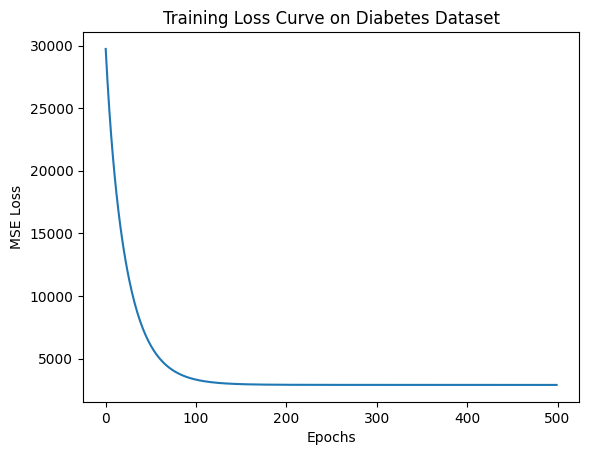

Test MSE Loss: 2884.8779


In [ ]:
## BSc CSIT ML Assignment: Diabetes Dataset Regression with PyTorch(by anup)

# - Used `load_diabetes()` dataset from sklearn.
# - Built and trained a linear regression model using PyTorch.
# - Plotted training loss curve.
# - Evaluated and visualized predictions.
# - Understood practical workflow for using real datasets in PyTorch.

# 1) importing some required libraires
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#2) lets load and explore the data sets
data = load_diabetes()

print(data.DESCR)  # shows what features it has

#3) loading the data
X = data.data      # shape: (442, 10)
y = data.target    # shape: (442,)

#4) preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#5)reshape y
y = y.reshape(-1, 1)  # shape: (442, 1)
#6) train test and slplit
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#7)coverting all the data we have got into pytorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
#8) building a linear regression
class LinearRegressionModel(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(in_features=10, out_features=1)
#9) defining loss and optimizer
criterion = nn.MSELoss()                   # Mean Squared Error for regression
optimizer = optim.SGD(model.parameters(), lr=0.01)

#10) Training the model
epochs = 500
losses = []

for epoch in range(epochs):
    model.train()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
#11)  visulaize loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve on Diabetes Dataset")
plt.show()

#12) it shows how the model performs on unknown data
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f"Test MSE Loss: {test_loss.item():.4f}")
#Steps we need to know Step	What you did
# Import libraries	torch, sklearn, matplotlib
# Load dataset	load_diabetes()
# Preprocess	Scaling, split, reshape
# Convert to tensors	For PyTorch compatibility
# Build model	Using nn.Linear
# Define loss & optimizer	MSELoss + SGD
# Train	Loop with backward and optimizer step
# Plot	Loss vs. epoch
# Evaluate	Check test loss
